In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [84]:
df = pd.read_csv("COVID-19/dati-regioni/dpc-covid19-ita-regioni.csv")
df['data'] = pd.to_datetime(df['data'])
date = list(set(df['data'].values))

In [85]:
regioni = list(set(df['denominazione_regione'].values))
regioni_valori = {regione: {} for regione in regioni}


In [86]:
for data in date:
    df_sel = df[df['data']==data]    
    #data_d = pd.to_datetime(data)
    for _, reg in df_sel.iterrows():
        
        regioni_valori[reg['denominazione_regione']][data] = reg['totale_casi']
        

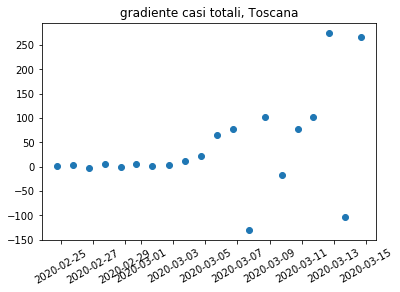

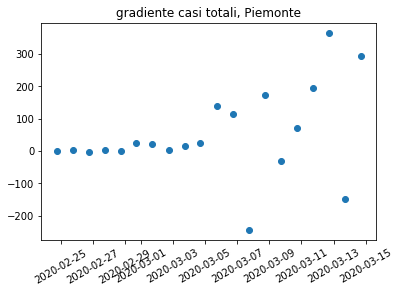

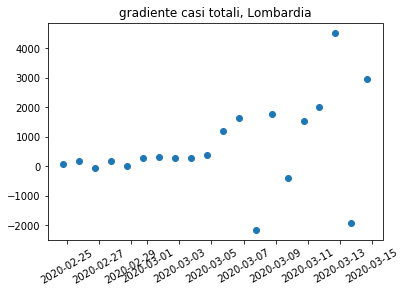

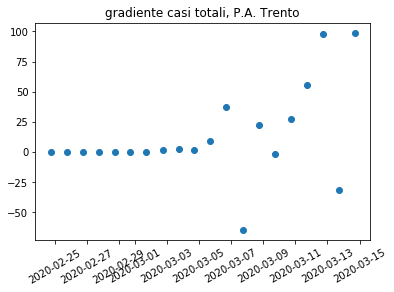

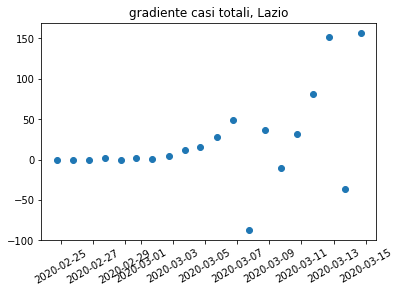

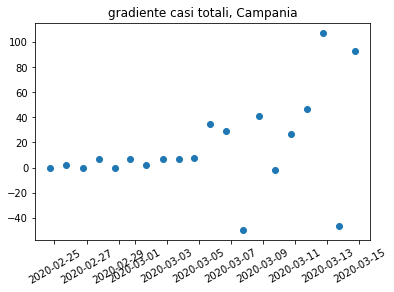

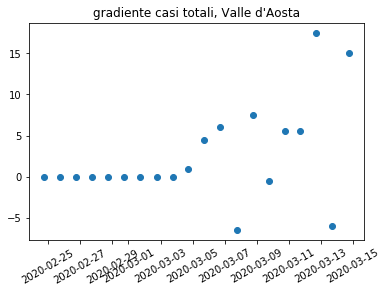

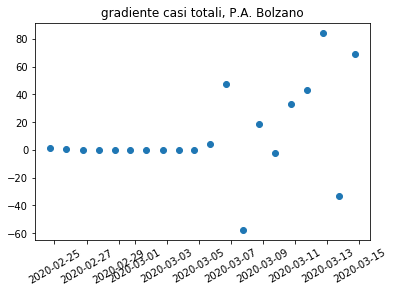

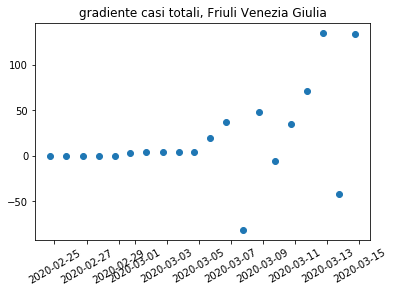

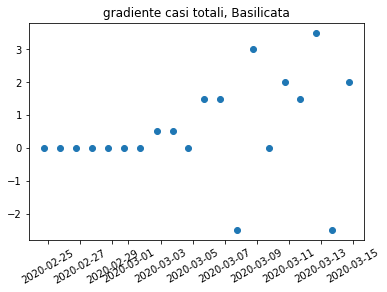

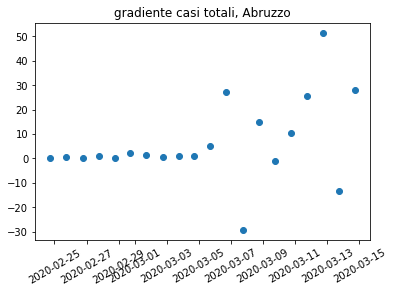

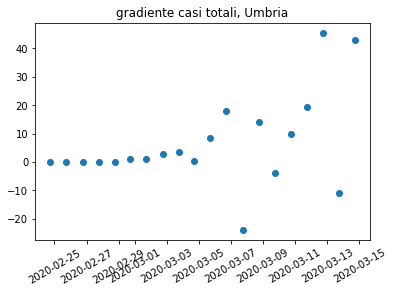

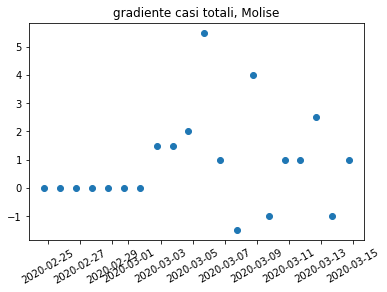

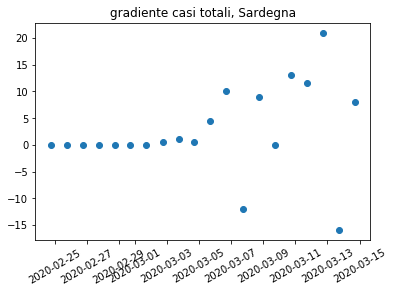

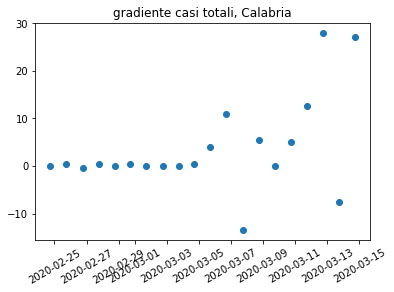

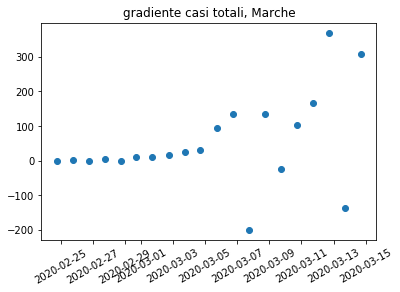

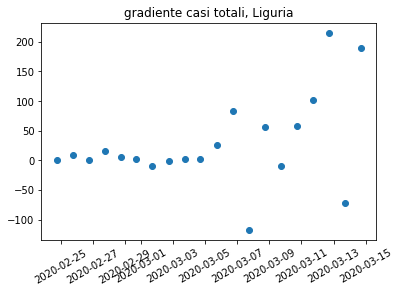

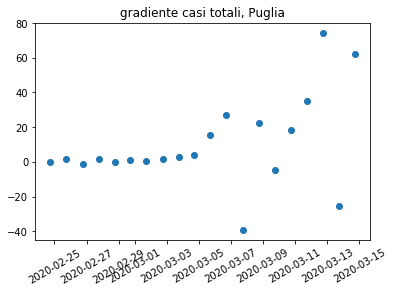

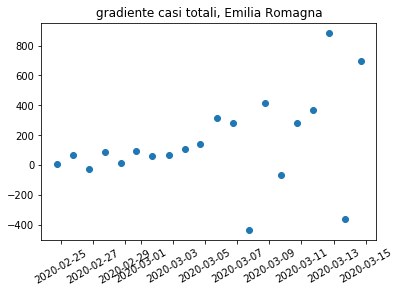

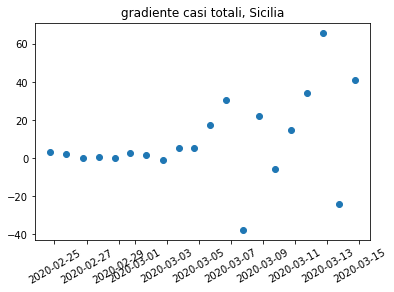

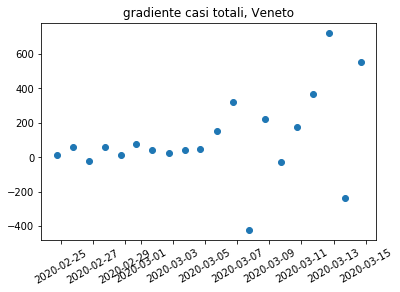

In [87]:
reg_ld = {}
for regione, date_valori in regioni_valori.items():

    valori = list(date_valori.values())
    last_gradient = valori[-1]-valori[-2]
    reg_ld[regione] = last_gradient
    plt.plot_date(date_valori.keys(), np.gradient(list(date_valori.values())))
    plt.title("gradiente casi totali, " + regione )
    plt.xticks(rotation=30)
    plt.show()
    

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text xticklabel objects>)

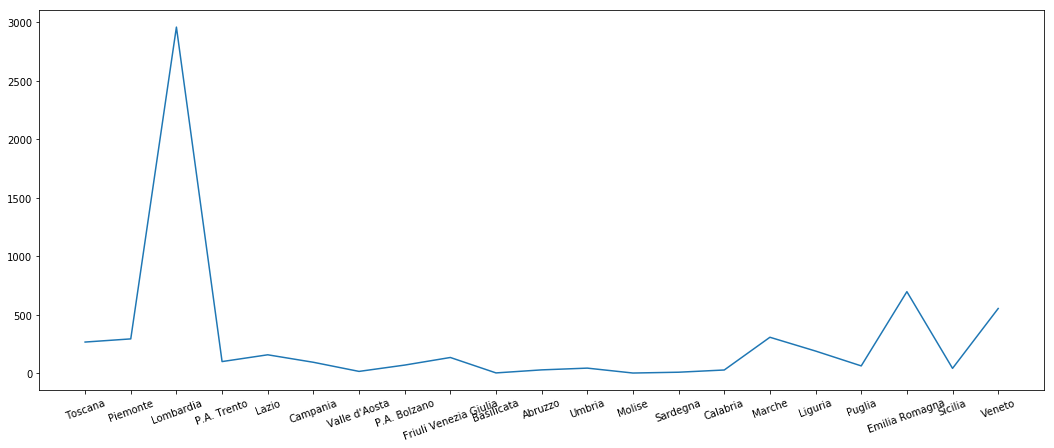

In [80]:
plt.figure(figsize=(18,7))
plt.plot(reg_ld.keys(), reg_ld.values())
plt.xticks(rotation=20)